In [66]:
data = pd.read_csv('212_fallzeit.csv')
data['Dichte'] += 0.0025 
data['Dichte'] /= 1000
data

,Kugeldurchmesser,Fallstrecke,Fallzeit 1,Fallzeit 2,Fallzeit 3,Fallzeit 4,Fallzeit 5,Dichte
0,9.000,200,6.28,6.07,6.15,6.14,6.12,0.001362
1,8.000,200,7.82,7.58,7.50,7.72,7.50,0.001357
2,7.144,200,8.45,8.26,8.58,8.29,8.51,0.001378
3,6.000,200,11.39,11.39,11.32,11.21,11.39,0.001378
4,5.000,200,15.23,15.32,15.54,15.58,15.53,0.001378
5,4.000,100,12.32,12.00,12.06,12.36,12.15,0.001378
6,3.000,50,10.39,10.20,10.29,10.06,10.28,0.001378
7,2.000,50,20.39,20.51,20.51,19.73,19.34,0.001378
8,1.500,50,33.93,34.04,34.82,34.48,33.89,0.001392


In [87]:
v = pd.DataFrame([data.iloc[:,1]/i[1] for i in list(data.loc[:,'Fallzeit 1':'Fallzeit 5'].iteritems())]).transpose()
vm = v.mean(axis=1)

ds = data['Kugeldurchmesser']/2
ds[6:] = ds[6:]*2

dt = 0.2

dv = sqrt(((dt/data.loc[:,'Fallzeit 1':'Fallzeit 5'])**2).add((ds/data['Fallstrecke'])**2, axis=0))
dv.columns = v.columns
dv *= v

dvm = sqrt((dv**2).sum(axis=1))/sqrt(5)

r_f = 1.1466/1000
dr_f = 0.0002/1000

dr_k = 0.0025/1000

vs,r_fs,r_ks = sm.symbols('v \\rho_f \\rho_k')
dvs,dr_fs,dr_ks = sm.symbols('dv d\\rho_f d\\rho_k')
f = vs/(r_ks - r_fs)

import fehler
f_abs, f_rel = fehler.fehler(f, vs, r_fs, r_ks)

y = array([f.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i])]) for i in range(9)], dtype=float)
dy = array([f_abs.subs([(vs, vm[i]), (r_fs, r_f), (r_ks, data['Dichte'][i]), (dvs, dvm[i]), (dr_fs, dr_f), (dr_ks, dr_k)]) for i in range(9)], dtype=float)

rsq = (data['Kugeldurchmesser']/2)**2

import scipy.optimize as o
g = lambda x, m: m*x
m = o.curve_fit(g, rsq, y, sigma=dy)
m = m[0][0]
m

8688.4709877509849

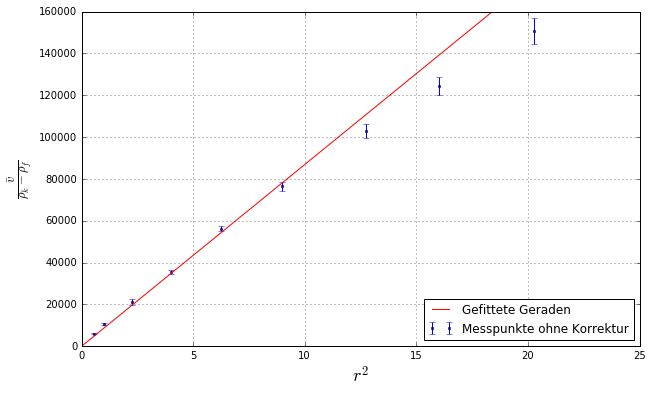

In [93]:
figure(figsize=(10,6), dpi=512)
errorbar(rsq, y, yerr=dy, fmt='s', markersize=2.0, label='Messpunkte ohne Korrektur')
xlim(0, 25)
ylim(0, 160000)
xlabel(r'$r^2$', fontsize=18)
ylabel(r'$\frac{{\bar{{v}}}}{{\rho_k-\rho_f}} $', fontsize=18)
plot(arange(0,25,0.1), g(arange(0,25,0.1), m), 'r-', label='Gefittete Geraden')
grid()
legend(loc=4)
show()